In [1]:
#Importing and installing necessary modules
!pip install powerlaw
import powerlaw
!pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

  Using cached powerlaw-1.5-py3-none-any.whl (24 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/8f/3e/4b8b40eb3c80aeaf360f0361d956d129bb3d23b2a3ecbe3a04a8f3bdd6d3/regex-2023.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached regex-2023.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
Using cached regex-2023.10.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (773 kB)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Examining data
%%bigquery
SELECT * FROM `fh-bigquery.reddit_comments.2014` limit 10;

Query is running:   0%|          |

Downloading:   0%|          |

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,...,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,removal_reason
0,You can almost see a woman in there,False,False,t1_cl0vrd1,Notlivin,None,0,1412500111,t5_vf2,t3_2ic0qa,...,-30,1426676657,0,0,cl0vrd1,nsfw,-30,None,None,None
1,[deleted],False,False,t1_ckugwbv,[deleted],None,0,1411877565,t5_vf2,t3_2hnju6,...,0,1426788925,0,0,ckugwbv,nsfw,0,None,None,None
2,[deleted],False,False,t1_cmyug6h,[deleted],None,0,1418931485,t5_vf2,t3_2pougm,...,-5,1425332368,0,0,cmyug6h,nsfw,-5,None,None,None
3,She can bend my spoke,False,False,t1_cm523s3,prongobot,None,0,1416241219,t5_vf2,t3_2mjt88,...,1,1425982446,0,0,cm523s3,nsfw,1,None,None,None
4,[Another](http://imgur.com/J1N7xNJ),False,False,t1_ckzikqf,gmick,None,0,1412356986,t5_vf2,t3_2i6znv,...,14,1426699981,0,0,ckzikqf,nsfw,14,None,None,None
5,that quality...,False,False,t1_cldimtm,edenevergreen,None,0,1413697783,t5_vf2,t3_2jlw1j,...,1,1426458242,0,0,cldimtm,nsfw,1,None,None,None
6,"hey, my nutsack does the same thing. Wanna see?",False,False,t1_cljvlph,rave420,None,0,1414290993,t5_vf2,t3_2kbk05,...,1,1426348964,0,0,cljvlph,nsfw,1,None,None,None
7,"I don't remember that scene, for some reason. ...",False,False,t1_clo6dw5,MrBullCrap,None,0,1414678806,t5_vf2,t3_2kny8m,...,1,1426275009,0,0,clo6dw5,nsfw,1,None,None,None
8,why the fuck does she use makeup? she would al...,False,False,t1_cljltld,abolishcapitalism,None,0,1414267916,t5_vf2,t3_2kac5a,...,-24,1426353684,0,0,cljltld,nsfw,-24,None,None,None
9,I've seen quite a few of these videos and am a...,False,False,t1_clqmr7r,Fatal510,None,0,1414911436,t5_vf2,t3_2kzer1,...,1,1426232338,0,0,clqmr7r,nsfw,1,None,None,None


In [3]:
#3.2.1 Q1

#Quantifying the popularity by how many appearances of authors in that subreddit and extracting the 50 subreddits with the
#highest counts.
%%bigquery
WITH UniqueUserCounts AS (
    SELECT 
        subreddit,
        COUNT(DISTINCT author) AS unique_user_count
    FROM 
        `fh-bigquery.reddit_comments.2014`
    WHERE
        author <> '[deleted]'
    GROUP BY 
        subreddit
)
SELECT 
    subreddit, 
    unique_user_count
FROM 
    UniqueUserCounts
ORDER BY 
    unique_user_count DESC
LIMIT 
    50;

Query is running:   0%|          |

Downloading:   0%|          |

,subreddit,unique_user_count
0,AskReddit,1942568
1,funny,1128978
2,pics,1016308
3,AdviceAnimals,725297
4,videos,694277
5,IAmA,682595
6,todayilearned,628700
7,WTF,600691
8,gaming,557985
9,worldnews,454643


In [4]:
#3.2.1 Q2

#Doing the same as question 1 but for all subreddits so it can be plotted as a pdf
%%bigquery
WITH ActiveUserCounts AS (
    SELECT 
        subreddit,
        COUNT(DISTINCT author) AS active_user_count
    FROM 
        `fh-bigquery.reddit_comments.2014`
    WHERE
        author <> '[deleted]'
    GROUP BY 
        subreddit
)

SELECT
    subreddit,
    active_user_count
FROM
    ActiveUserCounts
ORDER BY 
    active_user_count DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,subreddit,active_user_count
0,AskReddit,1942568
1,funny,1128978
2,pics,1016308
3,AdviceAnimals,725297
4,videos,694277
...,...,...
118982,atcq,1
118983,AntiChrist,1
118984,WSH,1
118985,beehacker,1


In [5]:
#putting all active users into a dataframe
client = bigquery.Client()
query = """
SELECT 
  subreddit, 
  COUNT(DISTINCT author) AS active_users_count
FROM 
  `fh-bigquery.reddit_comments.2014`
WHERE 
  author <> '[deleted]' AND LENGTH(author) > 0
GROUP BY 
  subreddit;
"""
query_job = client.query(query)
df_active_users = query_job.result().to_dataframe()
df_active_users.head(20)

,subreddit,active_users_count
0,GreenBayPackers,10947
1,trees,223697
2,NoFap,51289
3,intrusivethoughts,2937
4,Warthunder,13456
5,fatpeoplehate,20416
6,PokemonPlaza,4712
7,FantasyPowers,36
8,Cricket,7533
9,Jeep,10423


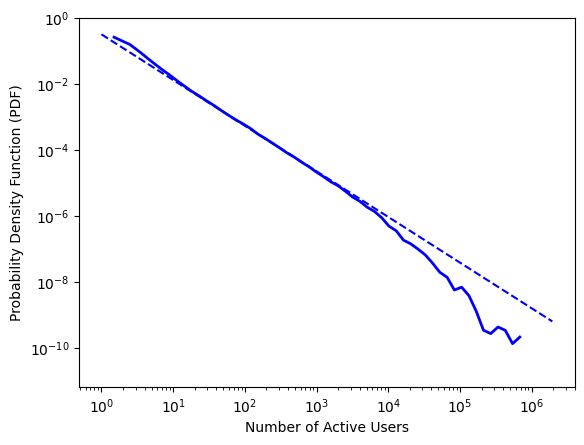

In [6]:
#plotting the pdf for active users per subreddit

data = df_active_users['active_users_count'].values
fit = powerlaw.Fit(data, xmin=1, discrete=True)
figPDF = fit.plot_pdf(color='b', linewidth=2)

fit.power_law.plot_pdf(color='b', linestyle='--', ax=figPDF)
plt.xlabel('Number of Active Users')
plt.ylabel('Probability Density Function (PDF)')
plt.show()


In [7]:
#3.2.1 Q3

#Ordering active users by descent and limiting 100 so the proportions can be calculated
client = bigquery.Client()
query = """
SELECT 
  subreddit, 
  COUNT(DISTINCT author) AS unique_users
FROM 
  `fh-bigquery.reddit_comments.2014`
WHERE 
  author <> '[deleted]' AND LENGTH(author) > 0
GROUP BY 
  subreddit
ORDER BY 
  unique_users DESC
LIMIT 
  100;
"""
query_job = client.query(query)
df_active_users_desc = query_job.result().to_dataframe()

df_active_users_desc.head(100)

,subreddit,unique_users
0,AskReddit,1942568
1,funny,1128978
2,pics,1016308
3,AdviceAnimals,725297
4,videos,694277
...,...,...
95,mildlyinfuriating,61591
96,dayz,59834
97,electronic_cigarette,58975
98,twitchplayspokemon,58820


In [8]:
#Calculating the proportions and adding it to a dataframe
top_100_subreddits = df_active_users_desc
proportions = top_100_subreddits['unique_users'].iloc[:-1].values / top_100_subreddits['unique_users'].iloc[1:].values
top_100_subreddits.loc[:99, 'proportion_to_next'] = proportions.tolist() + [None]  # The last subreddit does not have a following subreddit to compare to
print(top_100_subreddits[['subreddit', 'unique_users', 'proportion_to_next']])

               subreddit  unique_users  proportion_to_next
0              AskReddit       1942568            1.720643
1                  funny       1128978            1.110862
2                   pics       1016308            1.401230
3          AdviceAnimals        725297            1.044680
4                 videos        694277            1.017114
..                   ...           ...                 ...
95     mildlyinfuriating         61591            1.029365
96                  dayz         59834            1.014565
97  electronic_cigarette         58975            1.002635
98    twitchplayspokemon         58820            1.021748
99                 apple         57568                 NaN

[100 rows x 3 columns]


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


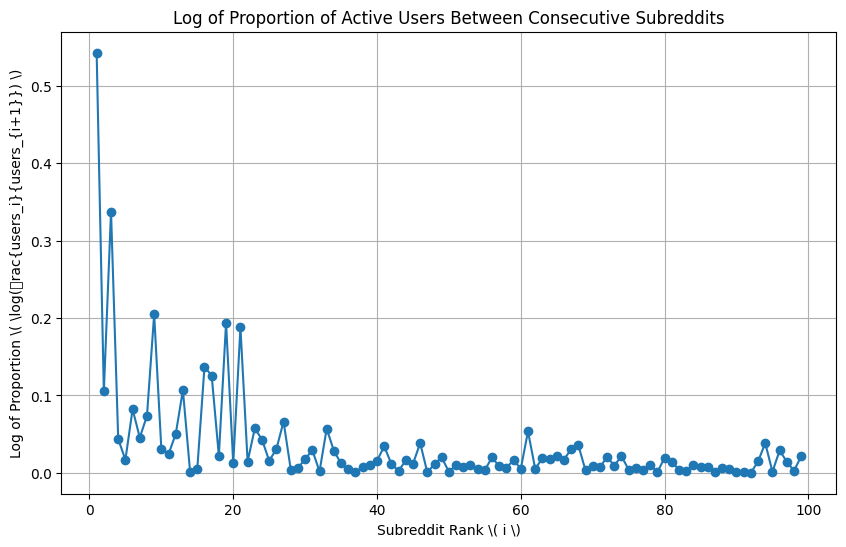

In [9]:
#plotting the log proportion of active users between consecutive subreddits. Used log to make the presentation more clear
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 101), np.log(top_100_subreddits[['proportion_to_next']]), marker='o')
plt.xlabel('Subreddit Rank \( i \)')
plt.ylabel('Log of Proportion \( \log(\frac{users_i}{users_{i+1}}) \)')
plt.title('Log of Proportion of Active Users Between Consecutive Subreddits')
plt.grid(True)
plt.show()


In [10]:
"""
There is significant variability among the top-ranked subreddits.
The high spikes indicate that the difference in the number of users between some adjacent ranks is quite large.
This suggests that the most popular subreddits are significantly more popular than the ones that follow.
As you move from left to right, the proportion decreases,
indicating that the drop in the number of users between consecutive subreddits becomes less steep.
The ratios become closer to 1, which is represented as 0 on the log scale.
Around the middle of the rank (approximately after rank 20), the proportions appear to stabilize somewhat, with fewer large spikes.
This implies that the popularity difference between consecutive subreddits becomes less pronounced.
Towards the end of the plot (ranks closer to 100), the log proportions are consistently closer to 0,
which suggests that the number of users is more evenly distributed across these subreddits.
"""

'\nThere is significant variability among the top-ranked subreddits.\nThe high spikes indicate that the difference in the number of users between some adjacent ranks is quite large.\nThis suggests that the most popular subreddits are significantly more popular than the ones that follow.\nAs you move from left to right (from higher to lower ranks), the proportion decreases,\nindicating that the drop in the number of users between consecutive subreddits becomes less steep.\nThe ratios become closer to 1, which is represented as 0 on the log scale.\nAround the middle of the rank (approximately after rank 20), the proportions appear to stabilize somewhat,with fewer large spikes.\nThis implies that the popularity difference between consecutive subreddits becomes less pronounced.\nTowards the end of the plot (ranks closer to 100), the log proportions are consistently closer to 0,\nwhich suggests that the number of users is more evenly distributed across these subreddits.\n'

In [11]:
#3.3 Q1

#Extracting the number of comments in a given hour per subreddit and adding it to a dataframe
client = bigquery.Client()

query = """
SELECT 
  subreddit, 
  EXTRACT(HOUR FROM TIMESTAMP_SECONDS(created_utc)) AS hour_of_day, 
  COUNT(*) AS num_comments
FROM 
  `fh-bigquery.reddit_comments.2014`
WHERE 
  subreddit IN ('AskReddit', 'houston', 'gaming', 'askscience', 'unitedkingdom')
GROUP BY 
  subreddit, 
  hour_of_day
ORDER BY 
  subreddit, 
  hour_of_day;
"""

query_job = client.query(query)
created_utc_df = query_job.result().to_dataframe()
created_utc_df.head()

,subreddit,hour_of_day,num_comments
0,AskReddit,0,2315849
1,AskReddit,1,2356192
2,AskReddit,2,2433752
3,AskReddit,3,2456242
4,AskReddit,4,2340474
5,AskReddit,5,2099732
6,AskReddit,6,1781999
7,AskReddit,7,1465255
8,AskReddit,8,1201049
9,AskReddit,9,1041922


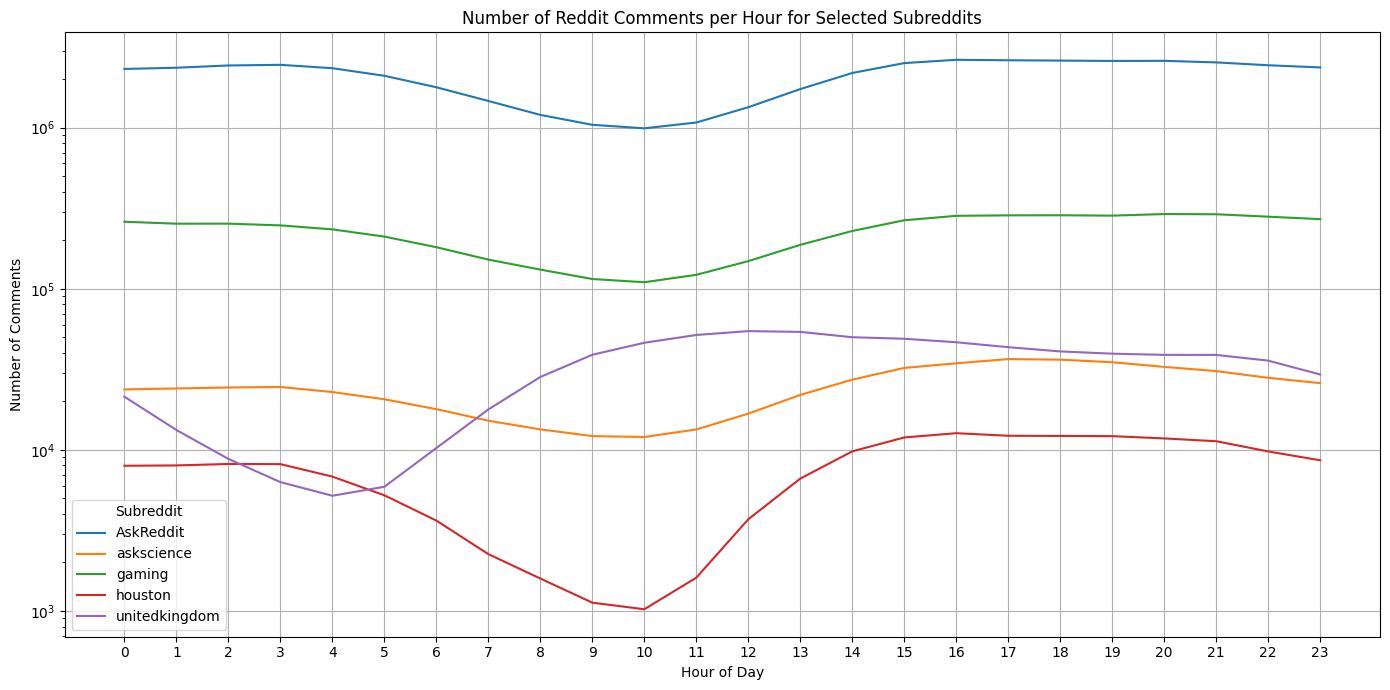

In [12]:
#3.3 Q2

#Plotting utc data from 0 to 23 on a log curve so comparisons can be made more clear. 
if not created_utc_df.empty:
    pivot_df = created_utc_df.pivot(index='hour_of_day', columns='subreddit', values='num_comments')
    pivot_df.fillna(0, inplace=True)
    plt.figure(figsize=(14, 7))
    for column in pivot_df.columns:
        if column in pivot_df:
            plt.plot(pivot_df.index, pivot_df[column], label=column)

    # Add some plot aesthetics
    plt.title('Number of Reddit Comments per Hour for Selected Subreddits')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Comments')
    plt.legend(title='Subreddit')
    plt.grid(True)
    plt.yscale('log')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()
else:
    print("The DataFrame is empty. Check your BigQuery results.")



In [13]:
"""
AskReddit: The peak activity for AskReddit is offset from /r/unitedkingdom, occurring a few hours later.
If /r/unitedkingdom's peak is in the evening (which is common for social media activity),
AskReddit's peak might suggest a user base in a timezone that is a few hours behind UTC, possibly in the American time zones (e.g., EST or PST).

askscience: This subreddit shows a peak that is somewhat similar to AskReddit, albeit a little less pronounced.
This could also suggest a significant user presence in American time zones.

gaming: The peak for gaming is even later than AskReddit, indicating a high likelihood that the user base could be even further west,
possibly in the Pacific Standard Time zone (PST) or other time zones that align with late-night hours in the Americas.

houston: Given that Houston is in the Central Time Zone (CT), which is 5 hours behind UTC,
the peak activity seems to align with late afternoon to evening in Houston, which is consistent with increased social media activity after typical working hours.

It's important to note that Reddit is a global platform, and any subreddit will have users from all over the world contributing at all times.
Peaks in activity likely correspond to when users in the most populous time zone(s) for that subreddit are most active, generally evenings.
However, the presence of activity throughout the day indicates a diverse user base from multiple time zones. Additionally,
user behavior can vary widely and can be influenced by factors other than time zone, such as work schedules, individual habits,
and the global nature of the Reddit communities.
"""


"\nAskReddit: The peak activity for AskReddit is offset from /r/unitedkingdom, occurring a few hours later.\nIf /r/unitedkingdom's peak is in the evening (which is common for social media activity),\nAskReddit's peak might suggest a user base in a timezone that is a few hours behind UTC, possibly in the American time zones (e.g., EST or PST).\n\naskscience: This subreddit shows a peak that is somewhat similar to AskReddit, albeit a little less pronounced.\nThis could also suggest a significant user presence in American time zones.\n\ngaming: The peak for gaming is even later than AskReddit, indicating a high likelihood that the user base could be even further west,\npossibly in the Pacific Standard Time zone (PST) or other time zones that align with late-night hours in the Americas.\n\nhouston: Given that Houston is in the Central Time Zone (CT), which is 5 hours behind UTC,\nthe peak activity seems to align with late afternoon to evening in Houston, which is consistent with increased 

In [14]:
#3.4 Q1

#extracting top 250 words per subreddit so all stop words can be extracted while making sure the other top 10 words remain.
#and adding them to a dataframe
%%bigquery askreddit_freq
WITH Words AS (
  SELECT
    subreddit,
    word
  FROM
    `fh-bigquery.reddit_comments.2014`,
    UNNEST(REGEXP_EXTRACT_ALL(LOWER(body), r'\b[a-zA-Z]+\b')) AS word
  WHERE
    subreddit IN ('AskReddit', 'houston', 'gaming', 'askscience', 'unitedkingdom')
    AND body NOT IN ('[deleted]', '[removed]')
)

SELECT
  subreddit,
  word,
  word_count
FROM (
  SELECT
    subreddit,
    word,
    COUNT(*) as word_count,
    ROW_NUMBER() OVER (PARTITION BY subreddit ORDER BY COUNT(*) DESC) as rn
  FROM
    Words
  GROUP BY
    subreddit,
    word
) 
WHERE
  rn <= 250
ORDER BY
  subreddit,
  word_count DESC;


Query is running:   0%|          |

Downloading:   0%|          |

In [15]:
#Checking the data
askreddit_freq

,subreddit,word,word_count
0,AskReddit,the,45033548
1,AskReddit,i,43238392
2,AskReddit,a,32490738
3,AskReddit,to,32093031
4,AskReddit,and,29418750
...,...,...,...
1245,unitedkingdom,little,15511
1246,unitedkingdom,maybe,15433
1247,unitedkingdom,best,15348
1248,unitedkingdom,fuck,15241


In [16]:
#removing stopwords and making a new filtered dataframe
stop_words = set(stopwords.words('english'))
df_filtered = askreddit_freq[~askreddit_freq['word'].isin(stop_words)]
df_filtered = df_filtered.reset_index(drop=True)

In [17]:
#checking data
df_filtered

,subreddit,word,word_count
0,AskReddit,amp,10246016
1,AskReddit,like,5864557
2,AskReddit,one,4505037
3,AskReddit,people,4387440
4,AskReddit,would,4224023
...,...,...,...
703,unitedkingdom,little,15511
704,unitedkingdom,maybe,15433
705,unitedkingdom,best,15348
706,unitedkingdom,fuck,15241


In [18]:
#limiting the words to top 10 words per subreddit
top_words_per_subreddit = df_filtered.groupby('subreddit')['word_count'].nlargest(10).reset_index()
top_words_merged = pd.merge(
    top_words_per_subreddit,
    df_filtered,
    on=['subreddit', 'word_count'],
    how='left'
)
top_words_final = top_words_merged.drop('level_1', axis=1)

In [19]:
#checking data
top_words_final

,subreddit,word_count,word
0,AskReddit,10246016,amp
1,AskReddit,5864557,like
2,AskReddit,4505037,one
3,AskReddit,4387440,people
4,AskReddit,4224023,would
5,AskReddit,3896651,get
6,AskReddit,3142527,time
7,AskReddit,2803622,know
8,AskReddit,2707161,think
9,AskReddit,2656358,really


In [ ]:
"""
Words like "like," "one," "people," "would," and "really" are popular across multiple subreddits.
This shows that regardless of the subreddit, there are common words that are frequently used in discussions.
The prevelance of these words indicate that personal opinions and comparisons my be commonly expressed in these subreddits.
Askreddit contains a variety of words which can be generally used in any topic of discussion which makes sense for an open-ended question forum.
Askscience features more specialised science terms such as "energy", "light, "water". This reflects the scientific nature of the discussions.
Gaming has words specific to gaming like "game," "games," and "play," highlighting discussions focused on gaming experiences and preferences.
Houston includes location-specific terms like "Houston" and internet-related words "http" and "com",
which might be associated with sharing local news or resources.
Unitedkingdom shows a mix of general words and "UK," emphasizing discussions related to the UK.
"""

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


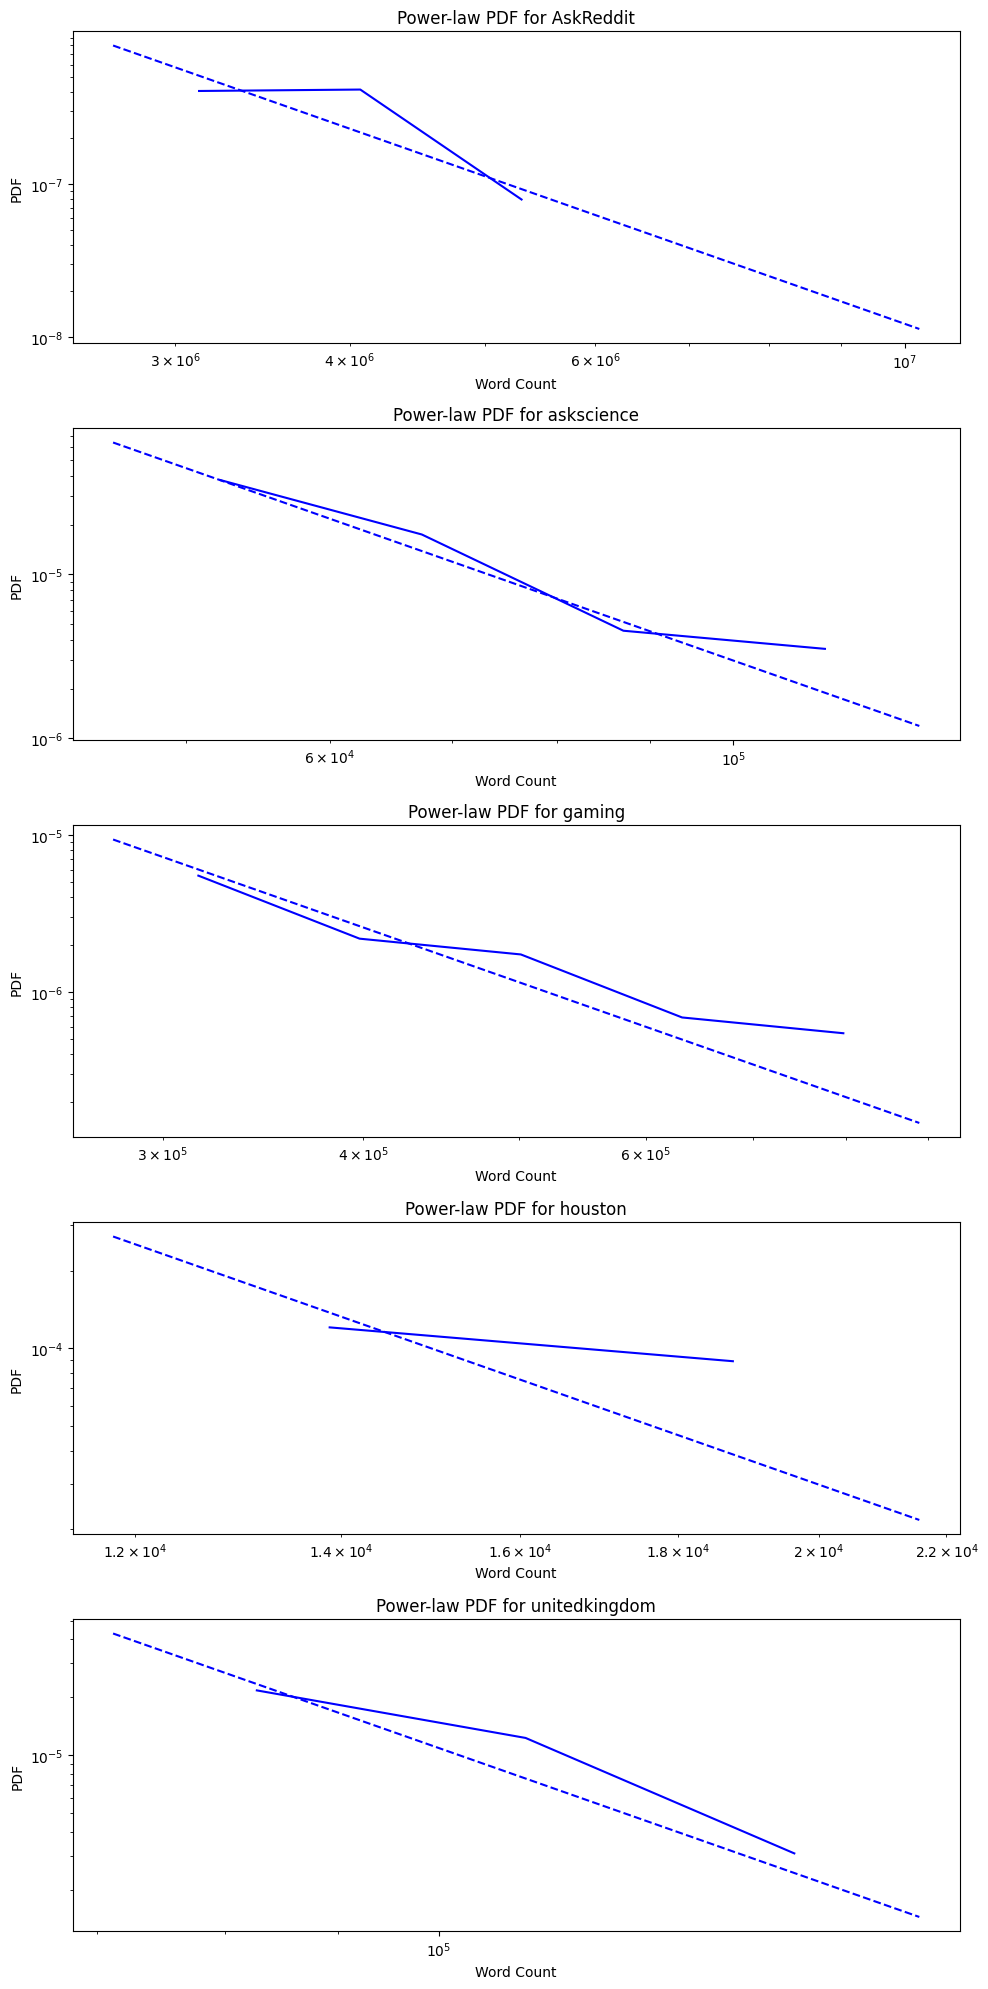

In [24]:
#3.4 Q2

#creating an individual pdf per subreddit to see the distribution of words
askreddit_data = top_words_final[top_words_final['subreddit'] == 'AskReddit']['word_count']
askscience_data = top_words_final[top_words_final['subreddit'] == 'askscience']['word_count']
gaming_data = top_words_final[top_words_final['subreddit'] == 'gaming']['word_count']
houston_data = top_words_final[top_words_final['subreddit'] == 'houston']['word_count']
unitedkingdom_data = top_words_final[top_words_final['subreddit'] == 'unitedkingdom']['word_count']

datasets = [askreddit_data, askscience_data, gaming_data, houston_data, unitedkingdom_data]
labels = ['AskReddit', 'askscience', 'gaming', 'houston', 'unitedkingdom']

def fit_and_plot_powerlaw(data, ax, label):
    fit = powerlaw.Fit(data, discrete=True)
    fit.power_law.plot_pdf(color='b', linestyle='--', ax=ax)
    fit.plot_pdf(color='b', ax=ax)
    
    ax.set_xlabel('Word Count')
    ax.set_ylabel('PDF')
    ax.set_title(f'Power-law PDF for {label}')

fig, axes = plt.subplots(5, 1, figsize=(10, 20))
for data, ax, label in zip(datasets, axes, labels):
    fit_and_plot_powerlaw(data, ax, label)
plt.tight_layout()
plt.show()


In [ ]:
"""
Zipf's Law suggests that the frequency of a given word is inversely proportional to its rank in the frequency table.
This relationship often results in a power-law distribution when plotting rank against frequency on a log-log scale, showing a straight line.
In the plots, the solid line represents the actual observed data of word frequencies within those communities,
and the dashed line represents the expected distribution according to Zipf's Law.
For all subreddits, the observed data follow a trend that is close to the power-law prediction,
as the solid lines closely mirror the dashed lines.
However there are deviations from the expected line,
particularly at the higher word counts.
In real-world datasets, perfect power-law behavior is rare; the distribution often follows a power-law only over a range of values.
The deviations indicates the point beyond which the power-law relationship becomes less accurate.
This might be due to a variety of factors, including a limited size of the dataset, the presence of stop words, or other linguistic phenomena not accounted for by a simple power-law model.
The range of word counts varies for each subreddit, which could suggest differences in content length, user engagement, or posting behavior.
For instance, in 'AskReddit, certain word counts reach over 10 million indicating a large volume of text,
possibly because it's a very popular and active subreddit with a broad topic range.
In conclusion, while the observed data generally support Zipf's Law, they also show the expected real-world deviations,
especially at higher word counts.
"""